In [1]:
import yfinance as yf
from pypfopt import expected_returns, EfficientSemivariance, EfficientFrontier, plotting
from pypfopt.risk_models import risk_matrix
import matplotlib.pyplot as plt
import numpy as np
from pypfopt.expected_returns import capm_return
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = yf.download(['AMZN', 'NVDA'], start='2020-01-01', end='2021-01-01')['Adj Close']
data

[*********************100%%**********************]  2 of 2 completed


,AMZN,NVDA
Date,,
2020-01-02,94.900497,59.749302
2020-01-03,93.748497,58.792957
2020-01-06,95.143997,59.039505
2020-01-07,95.343002,59.754276
2020-01-08,94.598503,59.866348
...,...,...
2020-12-24,158.634506,129.656693
2020-12-28,164.197998,128.721207
2020-12-29,166.100006,129.152771


In [3]:
#plt.plot(data['NVDA'])
#plt.plot(data['AMZN'])

In [4]:
mu = expected_returns.mean_historical_return(data)
historicalReturns = expected_returns.returns_from_prices(data)

In [5]:
mu

AMZN    0.715971
NVDA    1.180241
dtype: float64

In [6]:
historicalReturns

,AMZN,NVDA
Date,,
2020-01-03,-0.012139,-0.016006
2020-01-06,0.014886,0.004193
2020-01-07,0.002092,0.012107
2020-01-08,-0.007809,0.001876
2020-01-09,0.004799,0.010983
...,...,...
2020-12-24,-0.003949,-0.001192
2020-12-28,0.035071,-0.007215
2020-12-29,0.011584,0.003353


In [16]:
es = EfficientSemivariance(mu, historicalReturns)
es.efficient_return(0.02)

OrderedDict([('AMZN', 0.9999998131463174), ('NVDA', 1.870421454e-07)])

In [17]:
weights = es.clean_weights()
weights

OrderedDict([('AMZN', 1.0), ('NVDA', 0.0)])

In [18]:
es.portfolio_performance(verbose=True)

Expected annual return: 71.6%
Annual semi-deviation: 24.8%
Sortino Ratio: 2.81


(0.7159710352913378, 0.24777494149439777, 2.808883864904772)

In [19]:
S = risk_matrix(data)
S

,AMZN,NVDA
AMZN,0.148310,0.148669
NVDA,0.148669,0.335382


In [20]:
np.sqrt(S)

,AMZN,NVDA
AMZN,0.385110,0.385576
NVDA,0.385576,0.579121


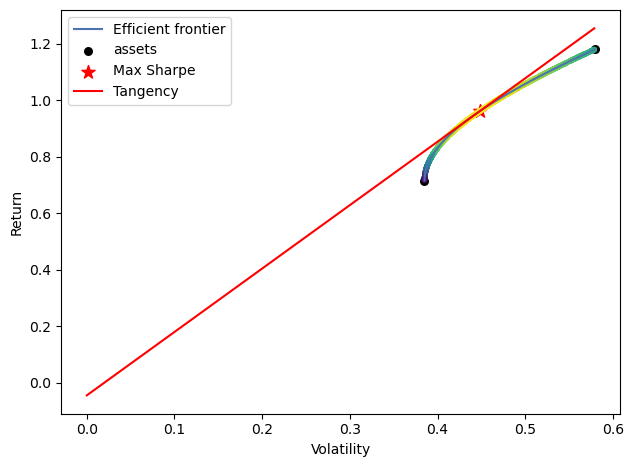

In [21]:

ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
efMaxSharpe = ef.deepcopy()
plotting.plot_efficient_frontier(ef, ax=ax)
efMaxSharpe.max_sharpe()
retTangent, stdTangent, _ = efMaxSharpe.portfolio_performance()
ax.scatter(stdTangent, retTangent, marker='*', s = 100, c='r', label='Max Sharpe')

Nsamples = 1024
w = np.random.dirichlet(np.ones(ef.n_assets), Nsamples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker='.', c=sharpes)

X = np.linspace(0, stds.max(), 50)
coefs = np.polyfit([.02, stdTangent], [0, retTangent], 1)
polynomial = np.poly1d(coefs)
Y = polynomial(X)
ax.plot(X, Y, c='r', label='Tangency')
ax.legend()

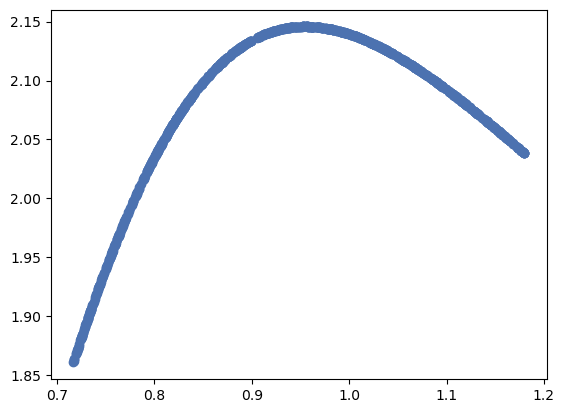

In [22]:
plt.clf()
plt.scatter(rets, sharpes)

In [23]:
efMaxSharpe.portfolio_performance(verbose=True)

Expected annual return: 96.2%
Annual volatility: 44.8%
Sharpe Ratio: 2.10


(0.9618721426977201, 0.4482943732018957, 2.101012635894796)

In [24]:
efMaxSharpe.clean_weights()

OrderedDict([('AMZN', 0.47035), ('NVDA', 0.52965)])